1. Change run type to GPU

CPU | GPU |
----| ----|
4 core: Parallel processing | CUDA Cores: ~1000 cores so in one shot we can execute large multiplications simultaneously|
1*2 + 2 * 3 + 3 * 6| if multiplication is huge and we have 4 cores only(CPU) it still takes lot of time. Not the case with GPU|
In parallel processing the three multiplications are done simultaneously using 3 cores| |

2. sklearn mostly used on CPU. If we have to do ML using GPU: JAX is the library we can use

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# check the version of tf 
tf.__version__

'2.12.0'

In [3]:
# Are we using GPU?
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi

Thu Apr 20 07:28:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# check the version of keras
tf.keras.__version__

'2.12.0'

In [6]:
# Get the mnist dataset
mnist = tf.keras.datasets.mnist

In [7]:
# seperate into train and test
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
# check the shape of data
x_train_full.shape, y_train_full.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
img = x_train_full[0]
img.shape

(28, 28)

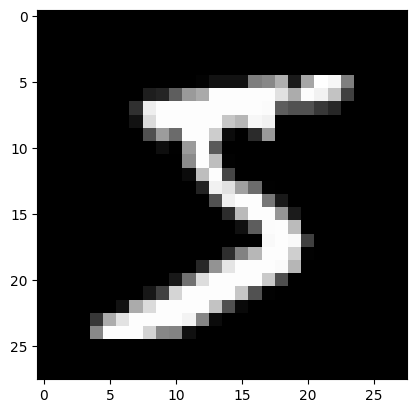

In [10]:
# plot the first image
plt.imshow(img, cmap = 'gray')
plt.show()

<Axes: >

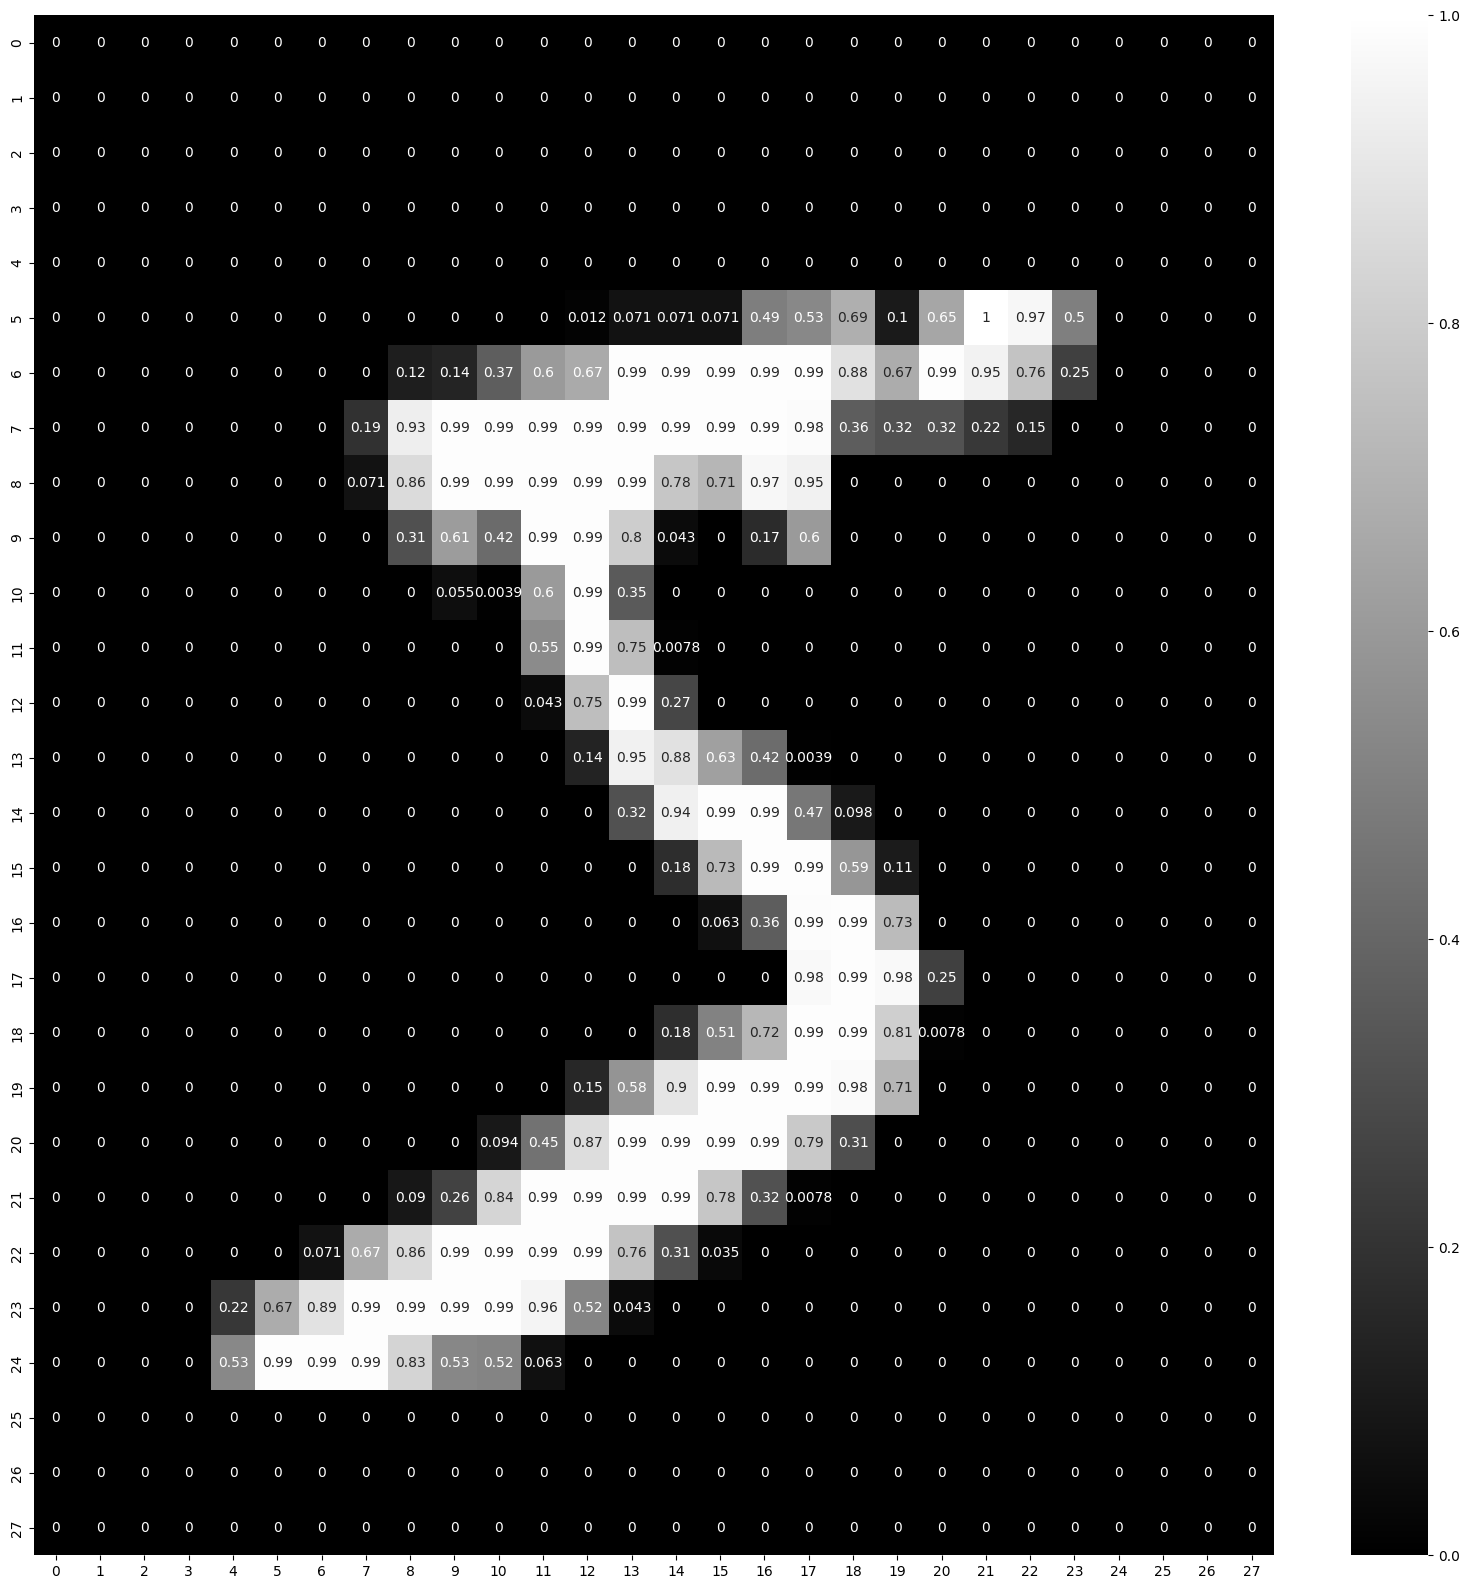

In [11]:
plt.figure(figsize = (20,20))
# scale the img and plot heatmap
sns.heatmap(img/255, annot = True, cmap = 'gray')

In [12]:
# create a validation set | remeber to scale the data

x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]

# scale the test dataset as well
x_test = x_test / 255

In [13]:
# flattening Operation
# first layer: 784 units of neurons



# two hidden layers with ReLU activation function
# create our first layer with 300 neurons



# create a second layer with 100 neurons



# output layer with 10 neurons:
# In multiclass classification usually we use softmax activation function

In [14]:
# create the layers as described above
CLASSES = 10

LAYERS = [
    tf.keras.layers.Flatten(input_shape = (28,28), name = "inputLayer"),
    tf.keras.layers.Dense(300, activation = 'relu', name = "hiddenLayer1"),
    tf.keras.layers.Dense(100, activation = 'relu', name = "hiddenLayer2"),
    tf.keras.layers.Dense(10, activation = 'softmax', name = "outputLayer")
]


In [15]:
model_clf = tf.keras.models.Sequential(LAYERS)

# why sequential? Every previous layer is connected to present layer and cannot be skipped in between

model_clf.layers


In [16]:
# get the summary:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
# param calculations
weights1 = 784*300
biases1 = 300
total1 = weights1 + biases1
total1

235500

In [18]:
total2 = 300*100 + 100
total2

30100

In [19]:
total3 = 100*10 + 10
total3


1010

In [20]:
total1 + total2 + total3

266610

In [21]:
# check the weights and biases
model_clf.layers

In [22]:
# access the first layer
model_clf.layers[1].name

'hiddenLayer1'

In [23]:
# weights and biases of first layer
weights, biases = model_clf.layers[1].get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [24]:
weights

array([[ 0.04353469,  0.06048496,  0.05091015, ..., -0.05249447,
        -0.00133816, -0.0456498 ],
       [ 0.05146705, -0.05087183, -0.0546162 , ...,  0.00045845,
         0.02897381,  0.06550713],
       [-0.06774379,  0.03224252, -0.01765534, ...,  0.01688544,
         0.01072681, -0.00724138],
       ...,
       [ 0.07231247,  0.07173935, -0.02312642, ...,  0.02442864,
        -0.03328049,  0.04519774],
       [-0.01275421,  0.04110063,  0.05447394, ..., -0.0168574 ,
         0.0275429 , -0.02959311],
       [ 0.00272039,  0.05986385, -0.04643231, ..., -0.07246114,
        -0.04086559, -0.02850926]], dtype=float32)

In [25]:
biases #initally biases are kept zero

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
# define the loss function
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = 'SGD'
METRICS = ['accuracy']

model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics = METRICS)

In [27]:
EPOCHS = 30
VALIDATION = (x_valid, y_valid)

history = model_clf.fit(x_train, 
              y_train, 
              batch_size = 32,
              epochs = EPOCHS, 
              validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 14s 4ms/step - loss: 0.5981 - accuracy: 0.8454 - val_loss: 0.2987 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2796 - accuracy: 0.9201 - val_loss: 0.2355 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2279 - accuracy: 0.9349 - val_loss: 0.1995 - val_accuracy: 0.9452
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1945 - accuracy: 0.9447 - val_loss: 0.1752 - val_accuracy: 0.9526
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1698 - accuracy: 0.9517 - val_loss: 0.1567 - val_accuracy: 0.9598
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1505 - accuracy: 0.9577 - val_loss: 0.1416 - val_accuracy: 0.9632
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1348 - accuracy: 0.9618 - val_loss: 0.1306 - val_accuracy

In [28]:
print(f"at every epoch the steps per epoch passed {round(55000/32,0)}")

at every epoch the steps per epoch passed 1719.0


In [29]:
# backpropogation 1719 time per epoch will take place
type(history.history)

dict

In [30]:
history.history.keys

<function dict.keys>

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.598056,0.845418,0.298663,0.9158
1,0.279642,0.920055,0.235481,0.9348
2,0.227873,0.934855,0.199454,0.9452
3,0.194470,0.944709,0.175155,0.9526
4,0.169800,0.951727,0.156692,0.9598
5,0.150475,0.957745,0.141599,0.9632
6,0.134823,0.961764,0.130601,0.9676
7,0.121899,0.965327,0.122076,0.9690
8,0.110908,0.968255,0.112566,0.9700
9,0.101444,0.971418,0.107860,0.9736


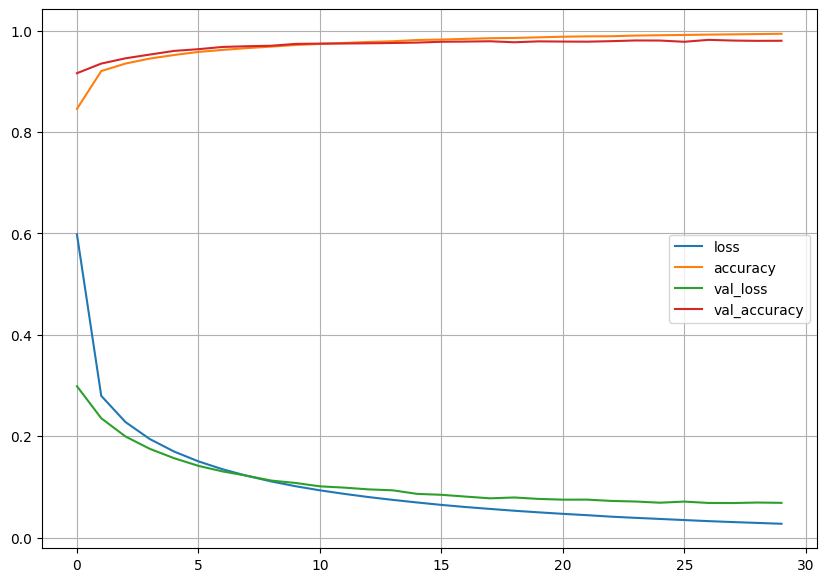

In [32]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.show()

In [33]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9775


[0.07039531320333481, 0.9775000214576721]

In [34]:
model_clf.save('test,h5')

In [35]:
# checking the probability:

x_new = x_test[:3]
y_proba = model_clf.predict(x_new)
y_proba.round(3)

1/1 [==============================] - 0s 73ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

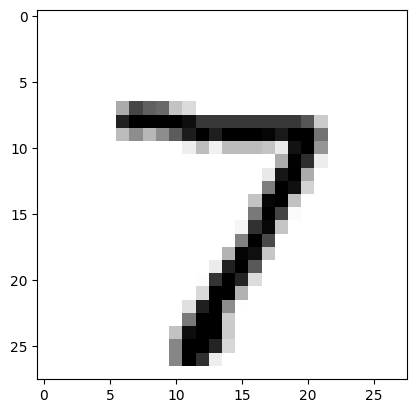

In [36]:
plt.imshow(x_new[0], cmap = 'binary')

In [37]:
y_pred = np.argmax(y_proba, axis = -1) # will consider all the lists seperately
# it will then give max value for each array seperately
y_pred

array([7, 2, 1])

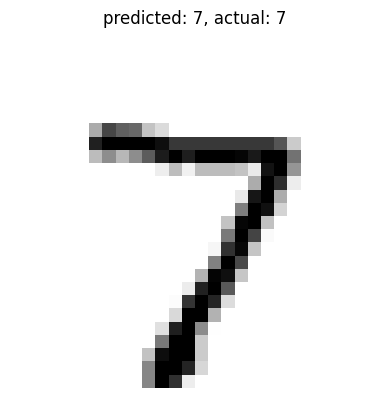

----------------------------------------


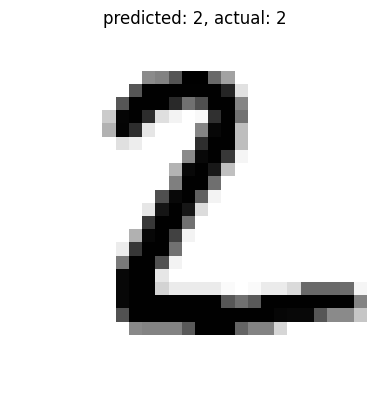

----------------------------------------


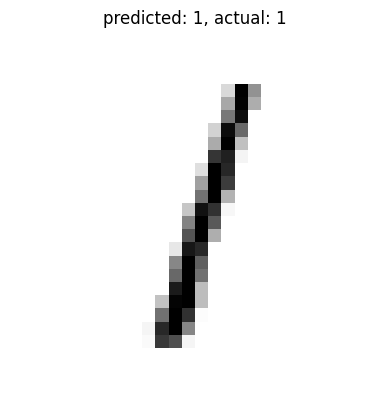

----------------------------------------


In [38]:
for img_array, pred, actual in zip(x_new, y_pred, y_test[:3]):
  plt.imshow(img_array, cmap='binary')
  plt.title(f'predicted: {pred}, actual: {actual}')
  plt.axis('off')
  plt.show()
  print('----------------------------------------')

In [38]:
# classification
# 1. softmax >> 2neurons (BINARY)
# 2. sigmoid >> 1 neuron (BINARY)
# 3. softmax >> n class neurons (Multiclass)

# regression:
# 1. activation function not needed usually